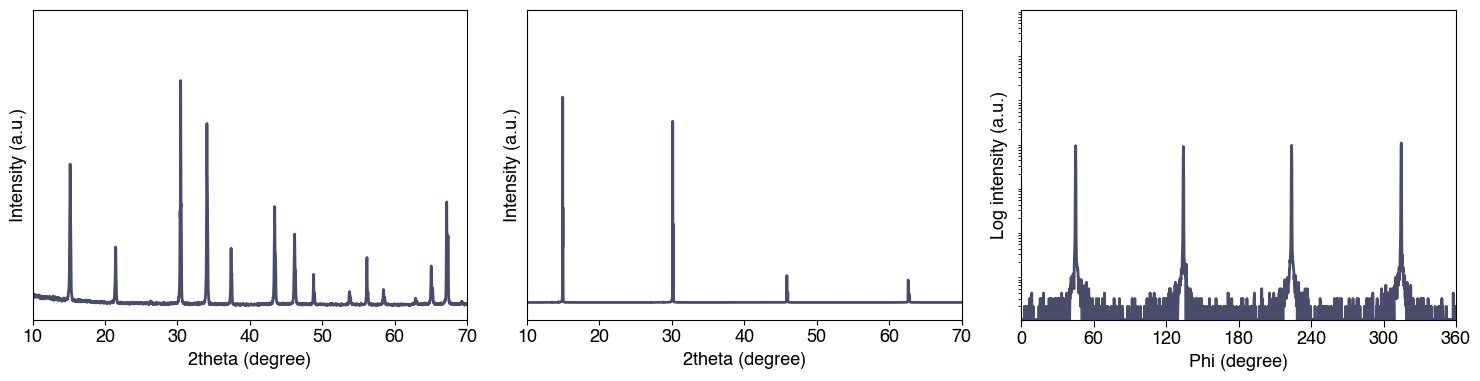

In [1]:
"""
MAPbBr3 Gonio scan, 230920_A_0.2

MAPbBr3 Powder scan

MAPbBr3 201 Phi scan, 230920_A_0.2
2 theta = 34.06
Chi = 26.57
Phi scan, step 0.2
"""

import matplotlib.pyplot as plt
import pandas as pd

save_option = True
figsavepath = "../Figures/Figure3_XRD.svg"

# Read data
path1 = '../Data/Figure3/MAPbBr3-powder-gonio.csv'
path2 = '../Data/Figure3/230920_A_0.2_gonio.csv'
path3 = '../Data/Figure3/230920_A_0.2_201Phi-scan.csv'

### Powder scan ###
df1 = pd.read_csv(path1, skiprows=26)
x1 = df1['Angle'].to_list()
y1 = df1[' Intensity'].to_list()

### Powder scan ###
df2 = pd.read_csv(path2, skiprows=30)
x2 = df2['Angle'].to_list()
y2 = df2[' Intensity'].to_list()

### Phi scan ###
df3 = pd.read_csv(path3, skiprows=31)
x3 = df3['Angle'].to_list()
y3 = df3[' Intensity'].to_list()
offset = 50
x3 = [(n+offset)%360 for n in x3]
y3_ = []
for i in range(len(x3)):
    y3_.append(y3[(x3.index(min(x3))+i)%len(x3)])
x3.sort()
    
# plot
plt.rcParams["font.size"] = 13
plt.rcParams['font.family'] = 'Helvetica'
fig, axes = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=(15,4))
color = "#474D6B"

axes[0].plot(x1,y1, color=color, linewidth=2)
# axes[0].set_yscale('log')
axes[0].set_xlim(10,70)
axes[0].set_ylim(-200,4500)
axes[0].set_ylabel('Intensity (a.u.)')
axes[0].set_xlabel('2theta (degree)')
axes[0].set_yticks([])

axes[1].plot(x2,y2, color=color, linewidth=2)
axes[1].set_xlim(10,70)
axes[1].set_ylim(-1e5,1.7e6)
axes[1].set_ylabel('Intensity (a.u.)')
axes[1].set_xlabel('2theta (degree)')
axes[1].set_yticks([])

axes[2].plot(x3,y3_, color=color, linewidth=2)
axes[2].set_yscale('log')
axes[2].set_ylim(1,1e7)
axes[2].set_yticks([])
axes[2].set_xlim(0,360)
axes[2].set_xticks([0,60,120,180,240,300,360])
axes[2].tick_params(length=5)
axes[2].set_xlabel('Phi (degree)')
axes[2].set_ylabel('Log intensity (a.u.)')

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight', transparent=True)